Problem Statement: 

we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as %pd

In [2]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data
df = pd.read_csv('advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's inspect the various aspects of our dataframe

In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Visualizing the data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Sales

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='TV', ylabel='Sales'>

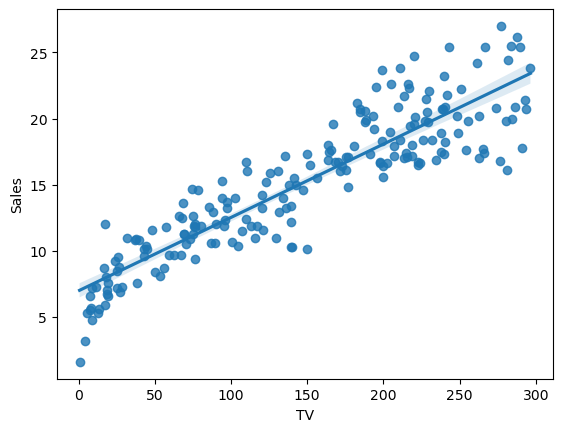

In [9]:
# visualize the data
sns.regplot(x='TV', y='Sales', data = df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

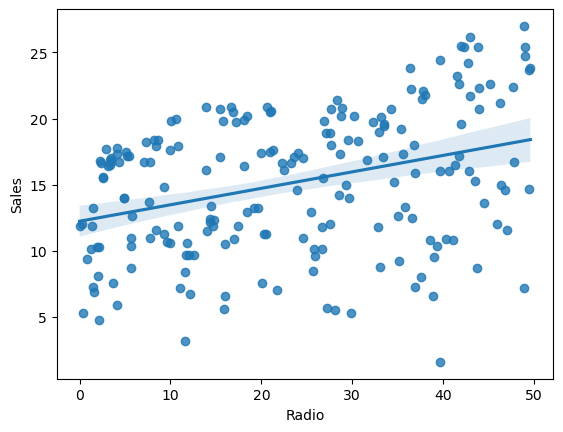

In [10]:
sns.regplot(x='Radio', y='Sales', data=df)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

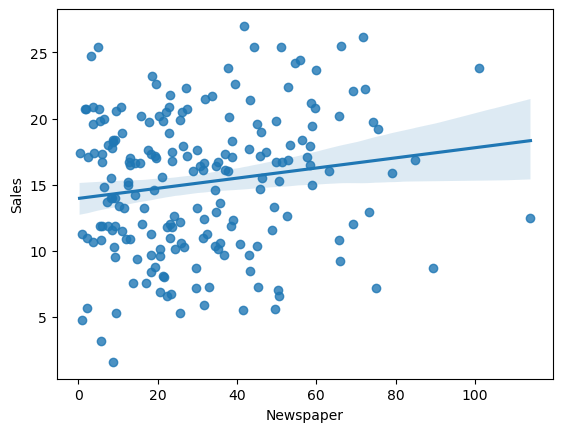

In [11]:
sns.regplot(x='Newspaper', y='Sales', data = df)

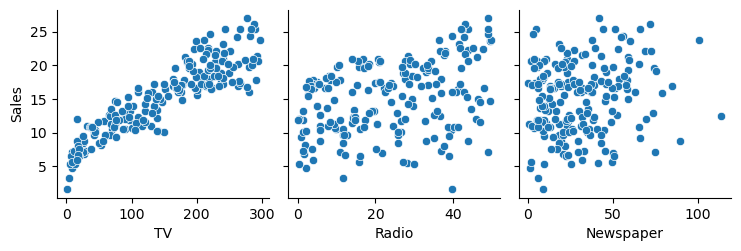

In [12]:
sns.pairplot(data = df, x_vars=['TV','Radio','Newspaper'],y_vars = "Sales")

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

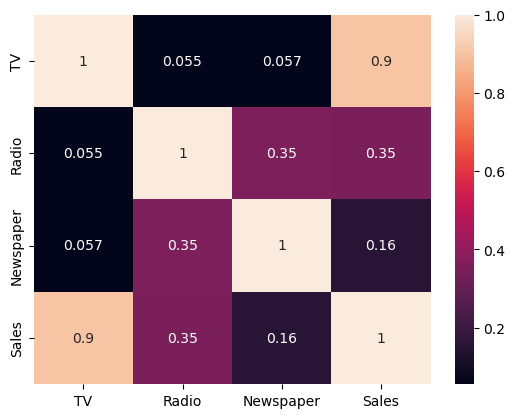

In [14]:
# visualize it
sns.heatmap(df.corr(), annot = True)

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

# Step 3: Performing Simple Linear Regression
Equation of linear regression

𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛 

𝑦  is the response
𝑐  is the intercept

𝑚1  is the coefficient for the first feature
𝑚𝑛  is the coefficient for the nth feature
In our case:

𝑦=𝑐+𝑚1×𝑇𝑉 

The  𝑚  values are called the model coefficients or model parameters.

In [15]:
 import statsmodels
import statsmodels.api as sm
import sklearn

Steps: 
    
    - create x and y
    - create train and test set (70-30)
    - Train model onthe training sets (learn the coeffiecient)
    - evaluate the model (training set, test set)

In [17]:
# 1. create x and y
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [19]:
X = df['TV']
y = df['Sales']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state =100)

In [23]:
X_train.shape

(140,)

In [24]:
y_train.shape

(140,)

In [26]:
X_test.shape

(60,)

In [27]:
# Training the model

# y = m1* TV +c

In [29]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [30]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [31]:
# y  = c+ m1.x1
# y = c.const + m1.TV

In [33]:
# fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

In [35]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [36]:
# sales = 6.94 * 0.05*TV

In [37]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.52e-52
Time:                        11:18:24   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# coeff and p-value
# R-squared is 81.68% very high
# F-statistic:	611.2
# P(Prob (F-statistic):	)

Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

𝑆𝑎𝑙𝑒𝑠=6.948+0.054×𝑇𝑉

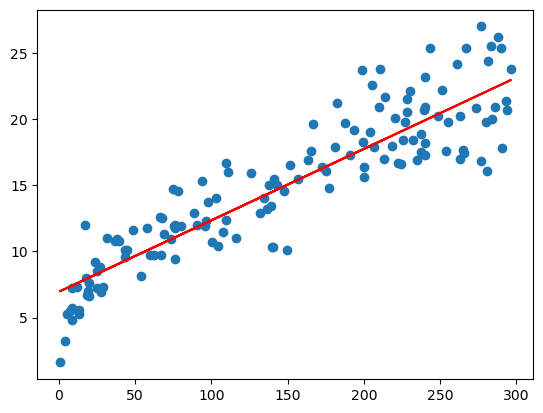

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# 3. Residual Analysis

In [43]:
# error = f(y_train - y_train_pred)

In [44]:
y_train_pred = lr_model.predict(X_train_sm)

In [45]:
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

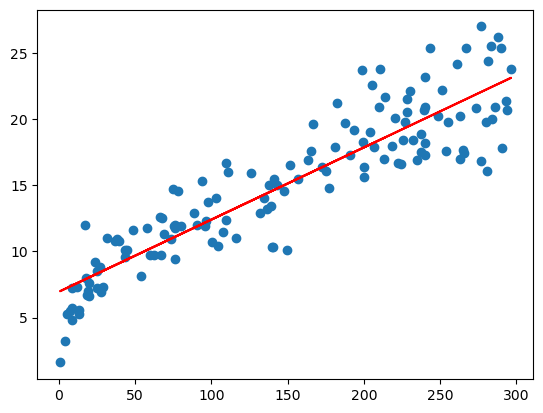

In [46]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

In [47]:
res = y_train-y_train_pred

In [48]:
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

Text(0.5, 1.0, 'Residual Plot')

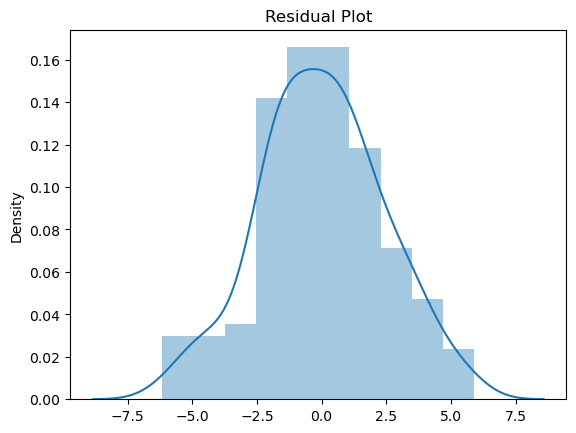

In [49]:
# plot the residuals
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')

The residuals are following the normally distributed with a mean 0. All good!

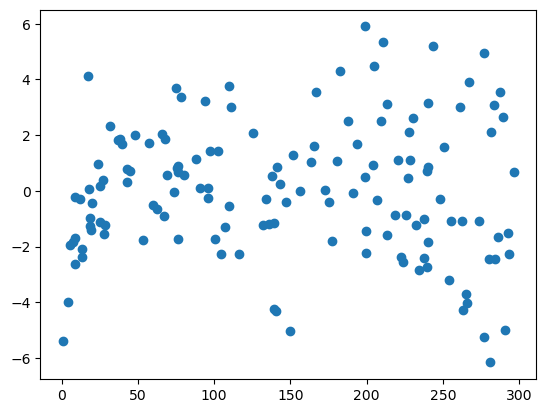

In [50]:
# look for patterns in residuals (we should not be able to identify)
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

# 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [55]:
#predict the y_test(y_test_pred)
# evaluate the model, r-squared on the test set
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_test_pred = lr_model.predict(X_test_sm)

In [57]:
# r-squred

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7921031601245658

In [69]:
# r2 on train set
mean_squared_error(y_true = y_test, y_pred = y_test_pred)

4.077556371826956

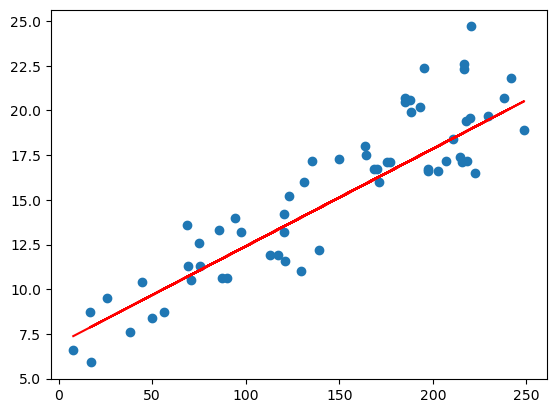

In [71]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# Linear Regression using linear_model in sklearn

Linear Regression using linear_model in sklearn
Apart from statsmodels, there is another package namely sklearn that can be used to perform linear regression. We will use the linear_model library from sklearn to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
X_train.shape

(140,)

In [73]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [78]:
#reshape to X_train to(n,1)

X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [81]:
# steps in sklearn model building
from sklearn.linear_model import LinearRegression

# 1. create an object of linear regression
lm = LinearRegression()

# 2. fit the model
lm.fit(X_train_lm, y_train)


LinearRegression()

In [85]:
# 3. see the params, make prediction (train,test)
print(lm.coef_)



[0.05454575]


In [86]:
lm.intercept_

6.9486832000013585

In [88]:
# make prediction
y_train_pred = lm.predict(X_train_lm)

In [89]:
y_test_pred = lm.predict(X_test_lm)

The equationwe get is the same as what we got before!

𝑆𝑎𝑙𝑒𝑠=6.948+0.054∗𝑇𝑉

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search et